In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")


In [104]:
df = pd.read_csv(r"D:\Student Preformance Indicator\notebook\data\stud.csv")

In [105]:
df.shape

(1000, 8)

In [106]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [107]:
#statistical summary
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- The means are very close to each other - between 66 to 68.05;
- All standard deviations are also close - between 14.6 to 15.19;
- there's a minimum score for math 0, while the minimium for writing is 10 and for reading is 17

In [108]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### *There are no missing values*

In [109]:
df.duplicated().sum()

np.int64(0)

### *There are no duplicated values in the dataset*

In [110]:
#checking the Nulls and data types
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race_ethnicity               1000 non-null   str  
 2   parental_level_of_education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test_preparation_course      1000 non-null   str  
 5   math_score                   1000 non-null   int64
 6   reading_score                1000 non-null   int64
 7   writing_score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.6 KB


In [111]:
#unique values in each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [112]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [113]:
#printing the categorical values in each categorical variable
print("The categorical values in the 'gender' variable are: ", df["gender"].unique().to_numpy())
print("The categorical values in the variable 'race_ethnicity' are: ", df["race_ethnicity"].unique().to_numpy())
print("The categorical values in the variable 'parental_level_of_education' are: ", df["parental_level_of_education"].unique().to_numpy())
print("The categorical values of the variable 'lunch' are: ", df["lunch"].unique().to_numpy())
print("The categorical values of the variable 'test_preparation_course' are: ", df["test_preparation_course"].unique().to_numpy())


The categorical values in the 'gender' variable are:  ['female' 'male']
The categorical values in the variable 'race_ethnicity' are:  ['group B' 'group C' 'group A' 'group D' 'group E']
The categorical values in the variable 'parental_level_of_education' are:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
The categorical values of the variable 'lunch' are:  ['standard' 'free/reduced']
The categorical values of the variable 'test_preparation_course' are:  ['none' 'completed']


In [114]:
#defining numerical and categorical features
numerical_features = ["math_score", "reading_score", "writing_score"]
categorical_features = ["gender", "race_ethnicity", "parental_level_of_education", "lunch", "test_preparation_course"]

In [115]:
#adding some important colunns
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average_score"] = df["total_score"] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# Data Visualization

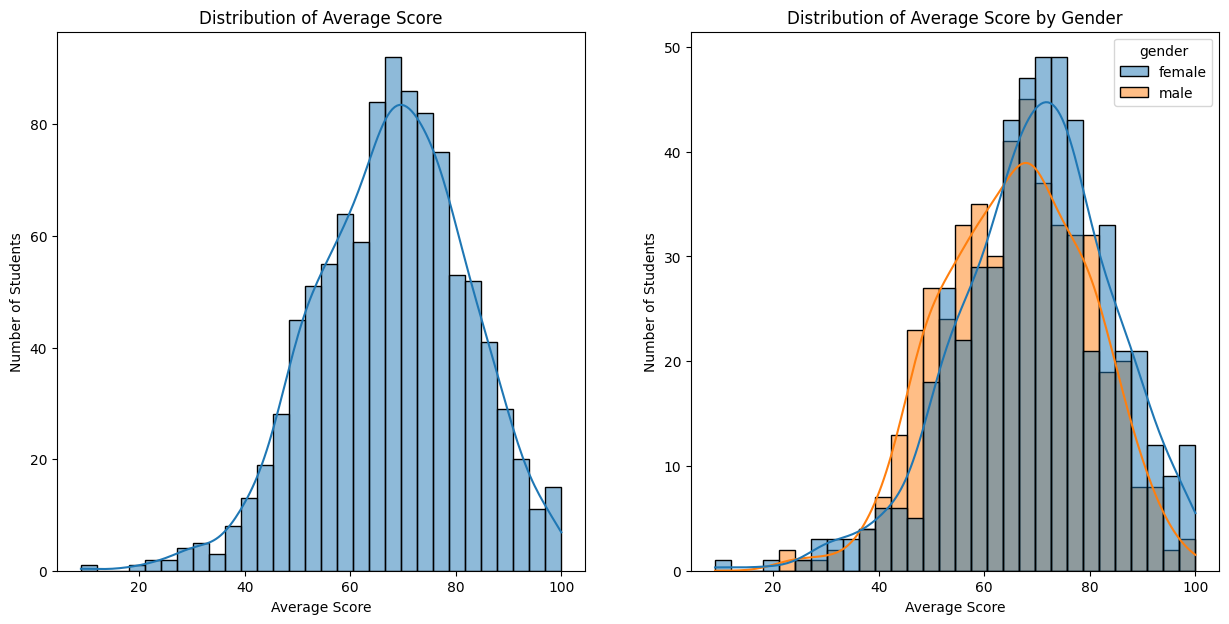

In [130]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.histplot(data = df, x = "average_score", kde = True, bins = 30)
plt.title("Distribution of Average Score")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")

plt.subplot(1,2,2)
sns.histplot(data =  df, x = "average_score", kde = True, bins = 30, hue = "gender")
plt.title("Distribution of Average Score by Gender")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")

plt.show()

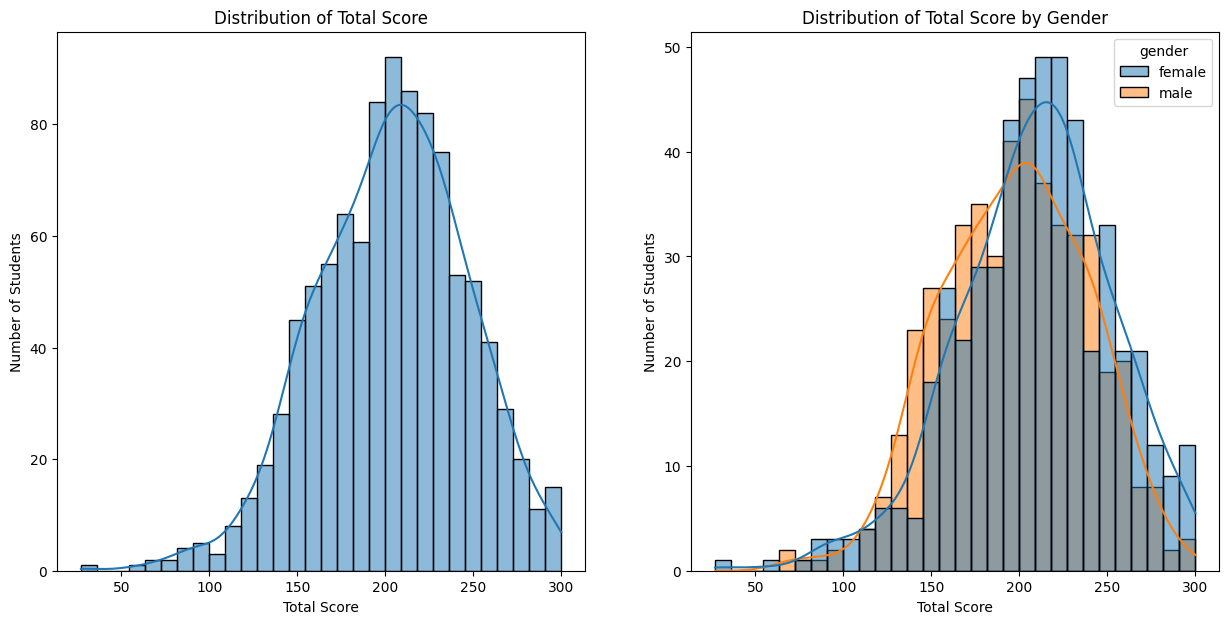

In [125]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.histplot(data = df, x = "total_score", kde = True, bins = 30)
plt.title("Distribution of Total Score")
plt.xlabel("Total Score")
plt.ylabel("Number of Students")

plt.subplot(1,2,2)
sns.histplot(data =  df, x = "total_score", kde = True, bins = 30, hue = "gender")
plt.title("Distribution of Total Score by Gender")
plt.xlabel("Total Score")
plt.ylabel("Number of Students")

plt.show()

### Female students tend to perform well than male students.

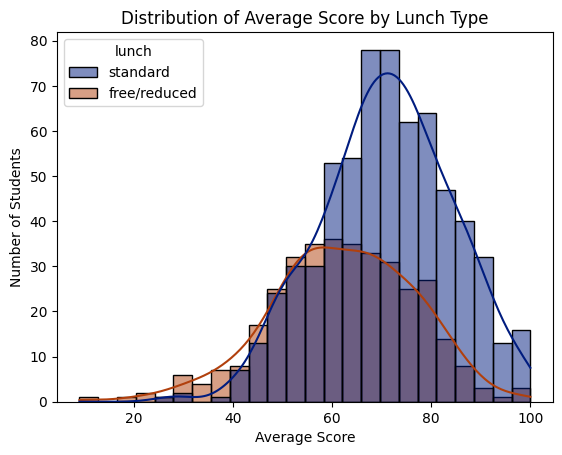

In [146]:
sns.histplot(data =  df, x = "average_score", kde = True, hue = "lunch", palette = "dark")
plt.title("Distribution of Average Score by Lunch Type")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")

plt.show()

### Students with standard lunch tend to have higher average scores than those with free/reduced lunch.

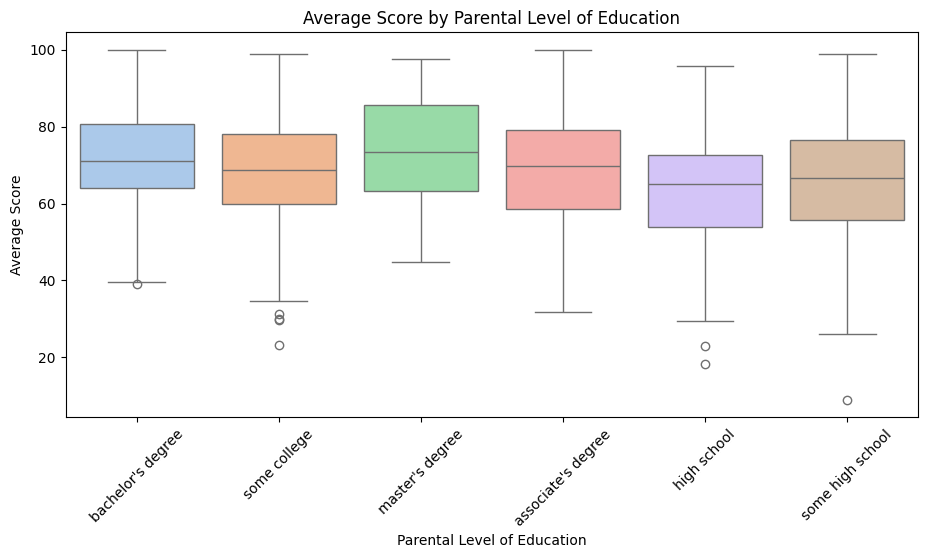

In [178]:
plt.figure(figsize = (11,5))
sns.boxplot(data = df, x="parental_level_of_education", y = "average_score", palette = "pastel")
plt.xticks(rotation = 45)
plt.title("Average Score by Parental Level of Education")
plt.xlabel("Parental Level of Education")
plt.ylabel("Average Score")
plt.show()


##### Students whose parents have higher education levels, such as a master's or bachelor's degree, tend to score higher on average. Conversely, students with parents who have only a high school education or some high school tend to have lower average scores, and their performance is more varied. This suggests a potential influence of parental education on student performance.


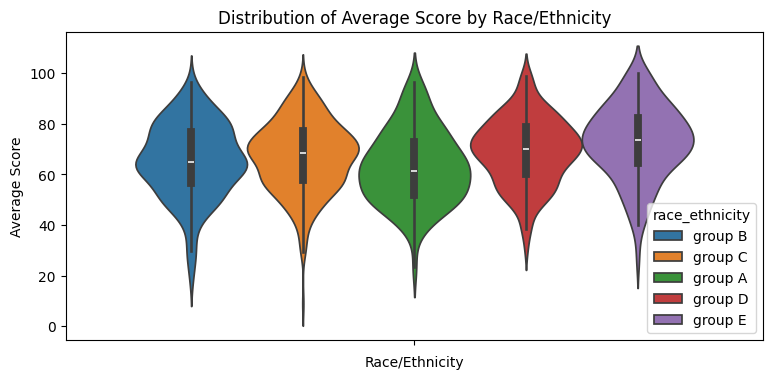

In [177]:
plt.figure(figsize=(9,4))

sns.violinplot(data = df, y = "average_score", hue = "race_ethnicity")
plt.title("Distribution of Average Score by Race/Ethnicity")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Average Score")

plt.show()

### Students from group E tend to have the highest average scores, followed by group D, while group A has the lowest.

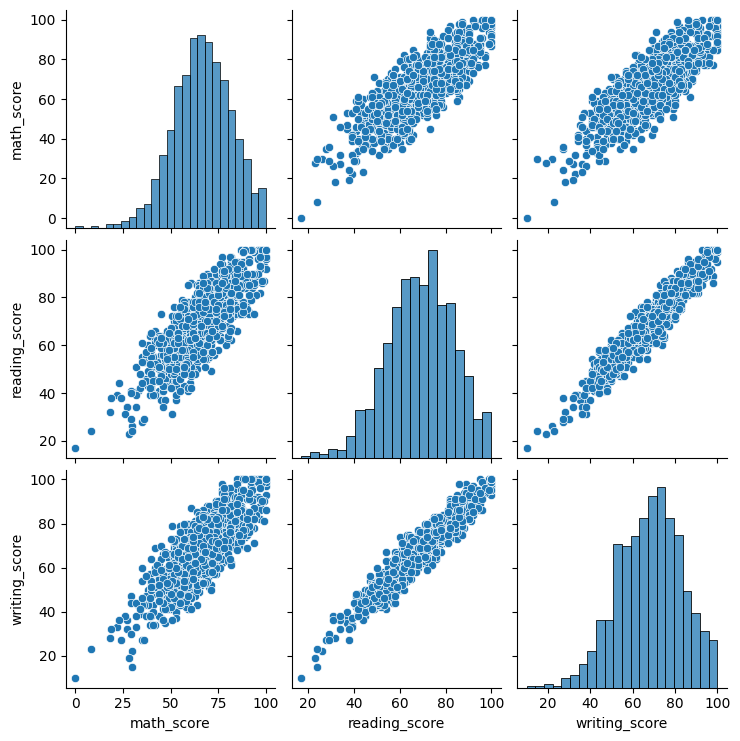

In [155]:
sns.pairplot(df[numerical_features])
plt.show()

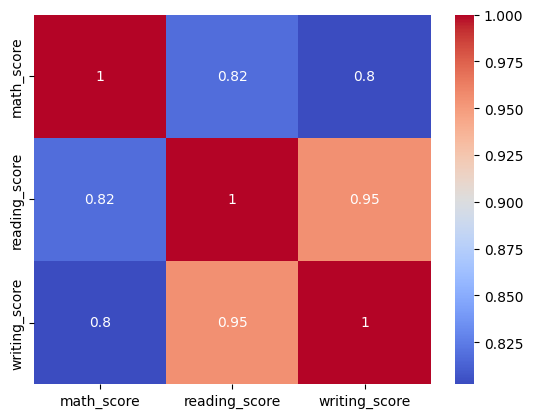

In [156]:
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm")
plt.show()

### The highest correlated variables are the writing_score with the reading_score, in the second place are the math_score with the reading_score which is slightly better than the math_score with the writing_score.